In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.35_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_trp')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band06_wn_1100_1215',
                          'ng_3',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_3',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.3_.35_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_5e-25',
                          'crd_a3d1611',
                          'atmpro_trp')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1100

nband = 115

nv = 200

dv = 0.005

tsfc = 300.0

ng = 3

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 3 /)

data wgt
     &     /.3, .35, .95/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 5e-25

include 'trp75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

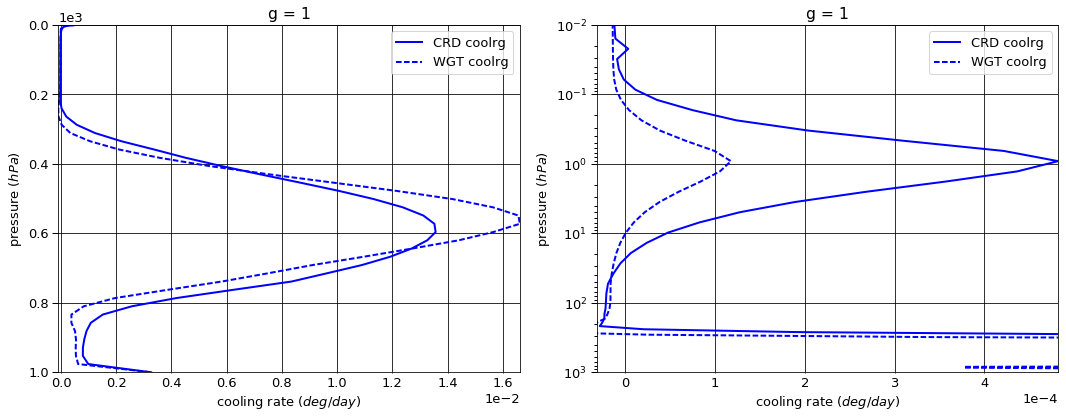

# Figure: cooling rate g-group 2

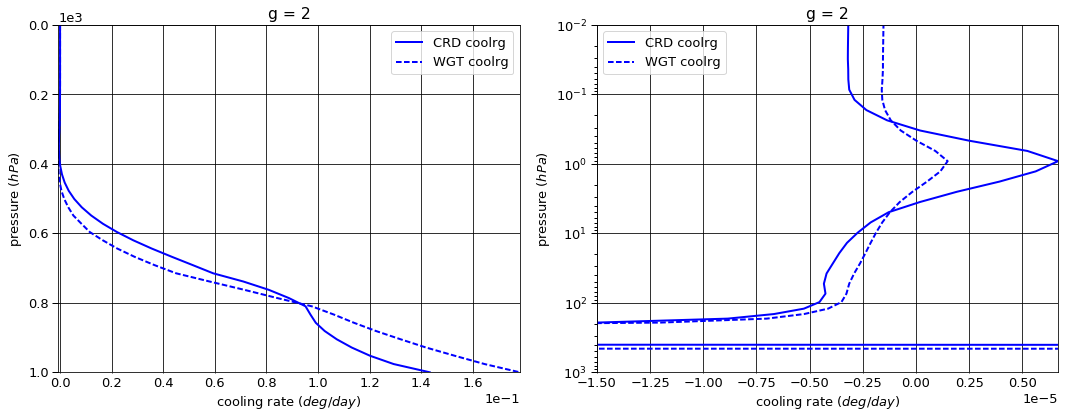

# Figure: cooling rate g-group 3

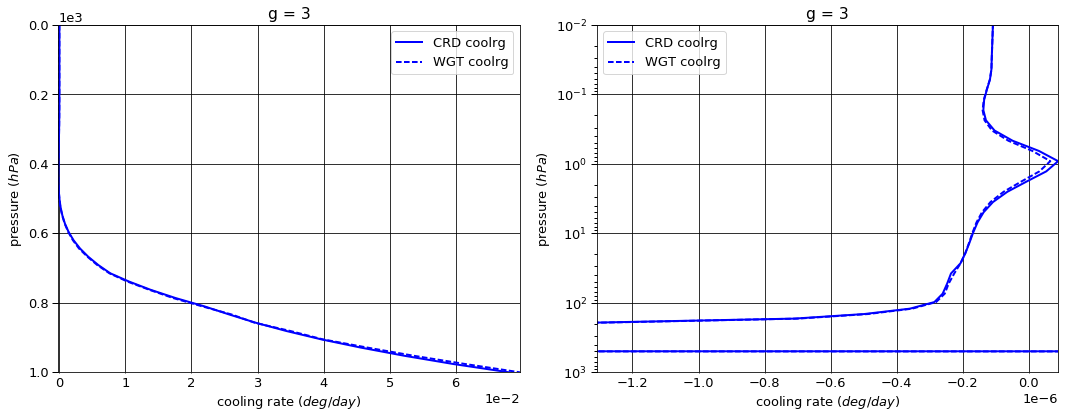

# Figure: cooling rate g-group total

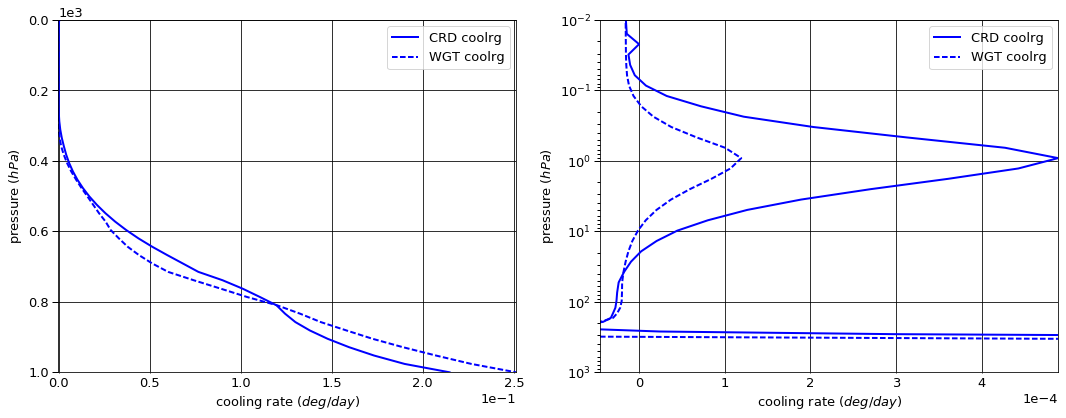

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.566841  0.000000  -0.566841
  1013.0   76     -1.168692  1.158367  -0.010324
2 0.0      1      -9.178510  0.000000  -9.178510
  1013.0   76    -10.576235  5.719314  -4.856921
3 0.0      1     -14.066714  0.000000 -14.066714
  1013.0   76    -14.320278  1.504488 -12.815790


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.556041  0.000000  -0.556041
  1013.0   76     -1.168692  1.159555  -0.009136
2 0.0      1      -9.366489  0.000000  -9.366489
  1013.0   76    -10.576235  5.713889  -4.862346
3 0.0      1     -14.068906  0.000000 -14.068906
  1013.0   76    -14.320278  1.516187 -12.804091


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.010800  0.000000  0.010800
  1013.0   76     0.000000  0.001188  0.001188
2 0.0      1     -0.187979  0.000000 -0.187979
  1013.0   76     0.000000 -0.005425 -0.005425
3 0.0      1     -0.002192  0.000000 -0.002192
  1013.0   76     0.000000  0.011699  0.011699

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.701361e-05
  1001.112500 75     3.267892e-03
2 0.000312    1     -3.083741e-06
  1001.112500 75     1.433569e-01
3 0.000312    1     -9.978774e-08
  1001.112500 75     6.807342e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.425566e-05
  1001.112500 75     3.285601e-03
2 0.000312    1     -1.452794e-06
  1001.112500 75     1.782704e-01
3 0.000312    1     -9.969168e-08
  1001.112500 75     6.971302e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.757950e-06
  1001.112500 75     1.770890e-05
2 0.000312    1      1.630947e-06
  1001.112500 75     3.491348e-02
3 0.000312    1      9.606500e-11
  1001.112500 75     1.639600e-03

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-23.812065,0.000000,-23.812065
1013.0,76,-26.065205,8.382169,-17.683036



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-23.991436,0.000000,-23.991436
1013.0,76,-26.065205,8.389631,-17.675573



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-0.179371,0.000000,-0.179371
1013.0,76,0.000000,0.007462,0.007462


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000020
1001.112500,75,0.214698



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000016
1001.112500,75,0.251269



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000004
1001.112500,75,0.036571


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.04613,0.044296
2,0.41687,0.401093
3,0.53700,0.554611


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.835681e-23
2,5.000596e-25
3,3.773541e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [3]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.835681e-23,NaN,0.04613,0.044296,0.04613,0.044296,600.0
2,5.000596e-25,0.017635,0.41687,0.401093,0.46300,0.445389,600.0
3,3.773541e-26,0.075462,0.53700,0.554611,1.00000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog       ratio
layer g                                                     
1     1     0.000312  8.378087e-23  1.048889e-24   79.875860
      2     0.000312  3.063243e-25  9.541258e-27   32.105233
      3     0.000312  5.081369e-27  3.669640e-28   13.847050
2     1     0.000750  8.443629e-23  1.051560e-24   80.296242
      2     0.000750  3.082904e-25  9.578751e-27   32.184820
      3     0.000750  5.121648e-27  3.686994e-28   13.891122
3     1     0.001052  8.577770e-23  1.056342e-24   81.202559
      2     0.001052  3.123091e-25  9.650819e-27   32.360887
      3     0.001052  5.204375e-27  3.721002e-28   13.986487
4     1     0.001476  8.715462e-23  1.061325e-24   82.118695
      2     0.001476  3.164304e-25  9.725109e-27   32.537466
      3     0.001476  5.289892e-27  3.755962e-28   14.083987
5     1     0.002070  8.854876e-23  1.066505e-24   83.027083
      2     0.002070  3.206000e-25  9.801033e-27   32.710839
      3     0.002070  5.377116e-27  3.791538e-28   14.181889
6     1     0.002904  8.995972e-23  1.071965e-24   83.920405
      2     0.002904  3.248171e-25  9.879120e-27   32.879152
      3     0.002904  5.466069e-27  3.827895e-28   14.279567
7     1     0.004074  9.138725e-23  1.077826e-24   84.788523
      2     0.004074  3.290816e-25  9.960171e-27   33.039749
      3     0.004074  5.556788e-27  3.865289e-28   14.376128
8     1     0.005714  9.283205e-23  1.084260e-24   85.617852
      2     0.005714  3.333963e-25  1.004536e-26   33.189076
      3     0.005714  5.649384e-27  3.904106e-28   14.470368
9     1     0.008015  9.429329e-23  1.091507e-24   86.388150
      2     0.008015  3.377599e-25  1.013627e-26   33.321900
      3     0.008015  5.743884e-27  3.944856e-28   14.560441
10    1     0.011243  9.577101e-23  1.099904e-24   87.072135
      2     0.011243  3.421739e-25  1.023520e-26   33.431092
      3     0.011243  5.840392e-27  3.988297e-28   14.643827
11    1     0.015771  9.726488e-23  1.109923e-24   87.632075
      2     0.015771  3.466394e-25  1.034536e-26   33.506759
      3     0.015771  5.939019e-27  4.035494e-28   14.716956
12    1     0.022122  9.877464e-23  1.122220e-24   88.017156
      2     0.022122  3.511583e-25  1.047127e-26   33.535412
      3     0.022122  6.039923e-27  4.087970e-28   14.774871
13    1     0.031031  1.003049e-22  1.137715e-24   88.163527
      2     0.031031  3.557483e-25  1.061950e-26   33.499544
      3     0.031031  6.143650e-27  4.148002e-28   14.811107
14    1     0.043528  1.022808e-22  1.158955e-24   88.252584
      2     0.043528  3.616787e-25  1.081974e-26   33.427673
      3     0.043528  6.279137e-27  4.228721e-28   14.848785
15    1     0.061057  1.094697e-22  1.202417e-24   91.041387
      2     0.061057  3.831310e-25  1.131671e-26   33.855350
      3     0.061057  6.777388e-27  4.446797e-28   15.241055
16    1     0.085645  1.248722e-22  1.279180e-24   97.618938
      2     0.085645  4.291123e-25  1.225472e-26   35.016082
      3     0.085645  7.908143e-27  4.874806e-28   16.222479
17    1     0.120136  1.449639e-22  1.382517e-24  104.855040
      2     0.120136  4.896150e-25  1.347327e-26   36.339722
      3     0.120136  9.531830e-27  5.447811e-28   17.496623
18    1     0.168516  1.675729e-22  1.513955e-24  110.685530
      2     0.168516  5.590060e-25  1.493604e-26   37.426660
      3     0.168516  1.158434e-26  6.163611e-28   18.794727
19    1     0.236378  1.927944e-22  1.684263e-24  114.468100
      2     0.236378  6.387788e-25  1.676450e-26   38.103062
      3     0.236378  1.418953e-26  7.093798e-28   20.002724
20    1     0.331549  2.207803e-22  1.907352e-24  115.752210
      2     0.331549  7.311157e-25  1.914011e-26   38.198085
      3     0.331549  1.751853e-26  8.341733e-28   21.001071
21    1     0.465100  2.516446e-22  2.201141e-24  114.324580
      2     0.465100  8.387638e-25  2.231938e-26   37.580068
      3     0.465100  2.179566e-26  1.006300e-27   21.659205
22    1     0.652400  2.820473e-22  2.574106e-2

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
